In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#导入任务地理位置数据
path='./Problem/附件一：已结束项目任务数据.xls'
origin=pd.read_excel(path)
data=origin.iloc[:,1:3]
data.head(5)

,任务gps 纬度,任务gps经度
0,22.566142,113.980837
1,22.686205,113.940525
2,22.576512,113.957198
3,22.564841,114.244571
4,22.558888,113.950723


In [3]:
#将地理信息存入列表
location=[]
for index in data.index:
    location.append(data.loc[index].tolist())

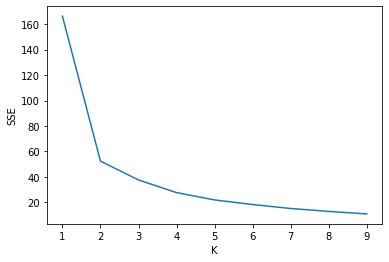

In [4]:
#使用K-Means算法聚类
SSE=[]
axis=[i for i in range(1,10)]
for n in range(1,10):
    kmeans=KMeans(n_clusters=n, random_state=0).fit(location)
    SSE.append(kmeans.inertia_)
plt.plot(axis,SSE)
plt.xlabel('K')
plt.ylabel('SSE')
plt.savefig('./figure/k_select.png', dpi=300)
plt.show()

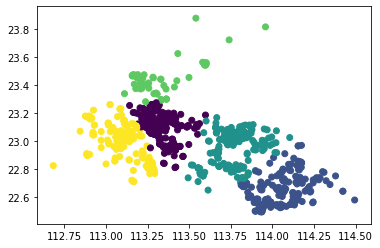

In [5]:
#画出聚类分布图
kmeans=KMeans(n_clusters=5, random_state=0).fit(location)
predict=kmeans.labels_
location=np.array(location)
plt.scatter(location[:,1], location[:,0], c=predict)
plt.savefig('./figure/areas.png', dpi=300)
plt.show()

In [6]:
#保存数据
column=['area']
result=pd.DataFrame(columns=column, data=predict+1)
result.to_excel('任务区域.xls')